In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn. cluster import KMeans, AgglomerativeClustering
import time

In [ ]:
data = pd.read_csv('customers.csv')

In [ ]:
data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [ ]:
data.drop('ID', axis=1, inplace=True)

In [ ]:
numeric = ['Age', 'Income']
data[numeric] = MinMaxScaler().fit_transform(data[numeric])

In [ ]:
data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,0.844828,2,0.324781,1,2
1,1,1,0.068966,1,0.420210,1,2
2,0,0,0.534483,1,0.195144,0,0
3,0,0,0.465517,1,0.496223,1,1
4,0,0,0.603448,1,0.413842,1,1


In [ ]:
model1 = KMeans(n_clusters=2, init='random', n_init=1)
model1.fit(data)

KMeans(init='random', n_clusters=2, n_init=1)

In [ ]:
model2 = KMeans(n_clusters=3, init='random', n_init=1)
model2.fit(data)

KMeans(init='random', n_clusters=3, n_init=1)

In [ ]:
model3 = KMeans(n_clusters=4, init='random', n_init=1)
model3.fit(data)

KMeans(init='random', n_clusters=4, n_init=1)

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)
# plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=model2.labels_, cmap='viridis')

reduced_data = pd.DataFrame(reduced_data, columns=['Dimension 1', 'Dimension 2'])
reduced_data['Cluster'] = model2.labels_
fig = px.scatter_3d(reduced_data, x='Dimension 1', y='Dimension 2', z='Cluster', color='Cluster', labels={'Cluster': 'Cluster'})
fig.update_layout(scene=dict(xaxis_title='Dimension 1', yaxis_title='Dimension 2', zaxis_title='Cluster'))
fig.update_traces(marker=dict(size=4))
fig.show()

In [ ]:
model5 = AgglomerativeClustering(metric='euclidean', linkage='single', compute_distances=True)
model5.fit(data)

AgglomerativeClustering(compute_distances=True, linkage='single',
                        metric='euclidean')

In [ ]:
model5.n_clusters

2

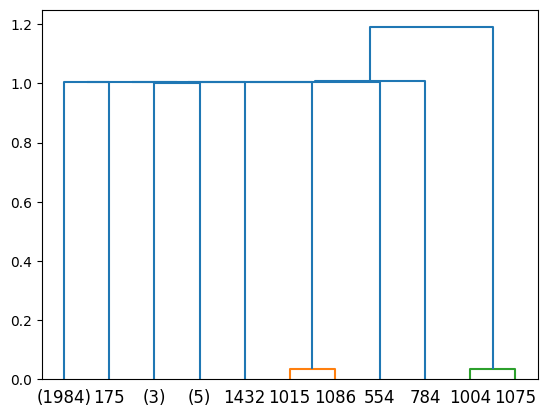

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram

counts = np.zeros(model5.children_.shape[0])
n_samples = len(model5.labels_)
for i, merge in enumerate(model5.children_):
  current_count = 0
  for child_idx in merge:
    if child_idx < n_samples:
      current_count += 1 # leaf node
    else:
      current_count += counts[child_idx - n_samples]
  counts[i] = current_count

linkage_matrix = np.column_stack([model5.children_, model5.distances_, counts]).astype(float)
# Plot the corresponding dendrogram
dendrogram(linkage_matrix, truncate_mode='level', p=6)
plt.show()

In [ ]:
start = time.time()
model2.fit(data)
print("KMeans Time (k=3): ", time.time()-start)

start = time.time()
model5.fit(data)
print("Agglomerative Clustering Time: ", time.time()-start)

KMeans Time (k=3):  0.016737937927246094
Agglomerative Clustering Time:  0.0617372989654541
